<div align="center" >
     <font size="5"> Graph Theory and Social Networks</font>
</div>

<p style="font-family: times, serif; font-size:11pt;">
    We have a dataset from the Stanford Network Analysis platform. This is a who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. The purpose of this project is to gain insights into the given network and detect communities using different community detection algorithms
</p>

Dataset for this Notebook can be found [here](http://snap.stanford.edu/data/soc-sign-bitcoin-otc.html)

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
df = pd.read_csv("soc-sign-bitcoinotc.csv")

In [40]:
df.head()

,6,2,4,1289241911.72836
0,6,5,2,1.289242e+09
1,1,15,1,1.289243e+09
2,4,3,7,1.289245e+09
3,13,16,8,1.289254e+09
4,13,10,8,1.289254e+09


In [41]:
#Dataset has no Column headings. Giving headings to columns.
df.columns = ["Source", "Target", "Rating", "Time"]

In [42]:
df.head()

,Source,Target,Rating,Time
0,6,5,2,1.289242e+09
1,1,15,1,1.289243e+09
2,4,3,7,1.289245e+09
3,13,16,8,1.289254e+09
4,13,10,8,1.289254e+09


In [43]:
G = nx.Graph()

In [44]:
G = nx.from_pandas_edgelist(df,'Source','Target', edge_attr=True ) #Graph Ceeated

Reducing dataset size for test runs.

In [199]:
G2 = nx.Graph()
df2 = df.sample(100)
G2 = nx.from_pandas_edgelist(df2, source='Source', target='Target')

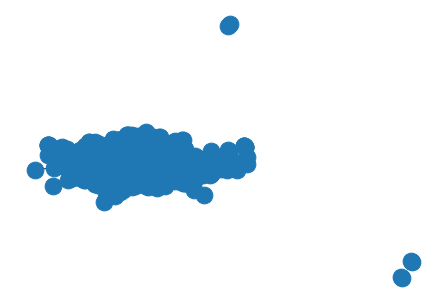

In [200]:
#drwing Grpah
nx.draw(G, edge_color='k',
         font_weight='light', node_size= 280, width= 0.9)

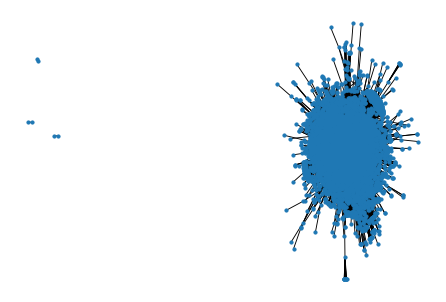

In [201]:
nx.draw(G, edge_color='k',
         font_weight='light', node_size= 10, width= 0.9) #draw graph with reduced size of node so that it is a bit clear.

***Let's do some basic statistics***

In [50]:
print("Number of nodes in the graph : " + str(G.number_of_nodes()))
print("Number of edges in the graph : " + str(G.number_of_edges()))

Number of nodes in the graph : 5881
Number of edges in the graph : 21492


In [45]:
#Possible components
[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

[5875, 2, 2, 2]

In [49]:
#Largest component
largest_cc = max(nx.connected_components(G), key=len)
len(largest_cc)

5875

In [55]:
nodes_with_degrees = sorted(G.degree, key=lambda x: x[1], reverse=True) #List of Nodes with Degrees

In [59]:
#Node with largest degreee
max(nodes_with_degrees[0])

795

In [60]:
#Let's find the betweennes centrality of a node. 
bt_centr_list = nx.betweenness_centrality(G2, k=None, normalized=True, weight=None, endpoints=False, seed=None)

In [169]:
#Maximum betweeness centrality value
max(bt_centr_list.values())

In [171]:
#Minimum betweennes centrality value
min(bt_centr_list.values())

0.0

In [128]:
#Find the possible communities
C=[len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
print(C)

[5875, 2, 2, 2]


<div align="center" >
     <font size="3"> Girvan Newman Algorithm</font>
</div>

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 26, 28, 29, 31, 32, 33, 34, 35, 36, 37, 39, 41, 44, 45, 46, 47, 51, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 65, 66, 68, 69, 70, 71, 72, 74, 75, 76, 77, 78, 79, 80, 81, 83, 86, 87, 88, 89, 93, 94, 95, 96, 97, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 122, 125, 127, 129, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255,

Wall time: 2h 47min 50s


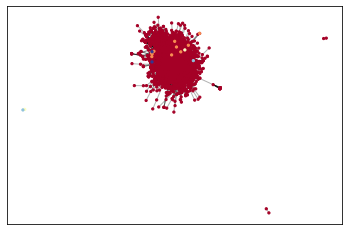

In [192]:
%%time
import itertools
comp = nx.algorithms.community.centrality.girvan_newman(G)
k=1
partition=dict()
arr=[]
for communities in itertools.islice(comp, k):
    print(tuple(sorted(c) for c in communities))
    arr.append(tuple(sorted(c) for c in communities))
for i in range(len(arr[0])):
    for j in range(len(arr[0][i])):
        partition[arr[0][i][j]]=i
pos=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=5, cmap=plt.cm.RdYlBu, node_color=sorted(list(partition.values())))
nx.draw_networkx_edges(G, pos, alpha=0.3)

***Girvan Community detection algorithm took 2 hours and 47 minuits to run. If the examiner wants to check the code  
by re-running it. It  is suggested to reduce the dataset size and then check it.***

In [195]:
%%time
#Detecting Communities by using most valuable edge
#As the algorithm takes extremely large amount of time. This cell is run with reduced dataset.

from networkx import edge_betweenness_centrality as betweenness
def most_central_edge(G2):
    centrality = betweenness(G2)
    return max(centrality, key=centrality.get)
comp =nx.algorithms.community.centrality.girvan_newman(G2, most_valuable_edge=most_central_edge)
tuple(sorted(c) for c in next(comp))

Wall time: 86.1 ms


([0, 1, 2, 83, 120, 121],
 [3, 122, 123],
 [4, 124, 125],
 [5, 126, 127],
 [6, 128, 129],
 [7, 94, 95, 130, 131],
 [8, 132, 133],
 [9, 134, 135],
 [10, 136, 137],
 [11, 138, 139],
 [12, 96, 97, 140, 141],
 [13, 142, 143],
 [14, 144, 145],
 [15, 84, 85, 98, 99, 146, 147],
 [16, 148, 149],
 [17, 86, 87, 100, 101, 150, 151],
 [18, 152, 153],
 [19, 154, 155],
 [20, 156, 157],
 [21, 158, 159],
 [22, 160, 161],
 [23, 80, 81, 162, 163, 164, 165],
 [24, 166, 167],
 [25, 102, 103, 168, 169],
 [26, 170, 171],
 [27, 172, 173],
 [28, 174, 175],
 [29, 176, 177],
 [30, 178, 179],
 [31, 180, 181],
 [32, 182, 183],
 [33, 184, 185],
 [34, 78, 79, 88, 89, 104, 105, 186, 187, 250, 251],
 [35, 106, 107, 188, 189],
 [36, 190, 191],
 [37, 108, 109, 192, 193],
 [38, 194, 195],
 [39, 196, 197],
 [40, 198, 199],
 [41, 110, 111, 200, 201],
 [42, 202, 203],
 [43, 204, 205],
 [44, 206, 207],
 [45, 112, 113, 208, 209],
 [46, 210, 211],
 [47, 212, 213],
 [48, 214, 215],
 [49, 216, 217],
 [50, 218, 219],
 [51, 220, 

In [33]:
from matplotlib.pyplot import figure

<div align="center" >
     <font size="3"> Clauset's Fast Greedy Algorithm</font>
</div>

[frozenset({1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 15, 16, 17, 19, 20, 21, 23, 25, 28, 29, 31, 32, 34, 36, 37, 39, 41, 44, 45, 46, 47, 52, 53, 54, 55, 56, 57, 60, 61, 62, 64, 66, 68, 69, 71, 72, 74, 75, 76, 77, 78, 80, 81, 83, 86, 87, 88, 89, 93, 94, 97, 99, 100, 104, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 122, 125, 127, 129, 131, 132, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145, 147, 149, 150, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 181, 183, 184, 185, 186, 187, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 217, 219, 220, 221, 222, 223, 225, 227, 228, 231, 232, 233, 235, 236, 237, 238, 239, 240, 241, 243, 244, 245, 247, 249, 251, 252, 254, 256, 258, 259, 262, 263, 265, 266, 269, 270, 271, 272, 273, 274, 276, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 

Wall time: 5min 49s


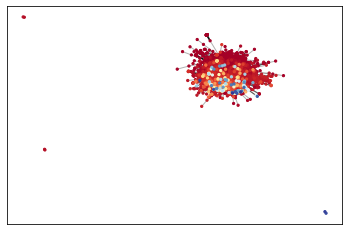

In [196]:
%%time
#Clauses Fast Greedy Algorithm

import matplotlib.cm as sm
pos = nx.spring_layout(G)
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))
print(c)
partition = dict()
ma=0
ind=0
x=[]
for i in range (len(c)):
    t=0
    if(len(c[i])>ma):
        ma=len(c[i])
        ind=i
    for j in c[i]:
        partition[j]=i
        t+=1
    x.append(t)
print(len(partition))
print(pos)
nx.draw_networkx_nodes(G,pos, node_size=5,cmap=plt.cm.RdYlBu, node_color=sorted(list(partition.values())))
print(partition.values())
nx.draw_networkx_edges(G, pos, alpha=0.3)

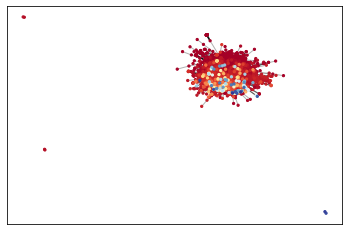

In [197]:
nx.draw_networkx_nodes(G,pos, node_size=5,cmap=plt.cm.RdYlBu, node_color=sorted(list(partition.values())))
nx.draw_networkx_edges(G, pos, alpha=0.3) # this code here is to show the graph clearly 

***Clauset’s FastGreedy Algorithm took 5 minuits and 49 seconds time to detect communities, which is way less than Girvan Newman  Community Detection Algorithm***

<div align="center" >
     <font size="3"> Louvain's Algorithm</font>
</div>

In [31]:
#Lets find different communities using Louvain's Algorithm.
pip install python-louvain

Note: you may need to restart the kernel to use updated packages.


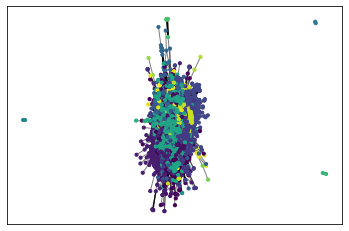

Wall time: 4min 18s


In [198]:
%%time
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx


#first compute the best partition
partition = community_louvain.best_partition(G, random_state=20)

# compute the best partition
#partition = community_louvain.best_partition(G1)

# draw the graph
pos = nx.spring_layout(G)
# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

***Louvain Algoritm took 4 min 18 seconds to run. Therefore relative to the other two algorithms, Lovain's Algorithm appears to have the best performance.***

<div align="center" >
     <font size="3"> Conclusion</font>
</div>



- Girvan Newman Algorithm took 2 hours and 47 minuits.  
- Clauset's FastGreedy Algorithm took 5 minuits and 49 Seconds.
- Louvain's Algorithm took 4 minuits 18 Seconds.

**Hence Louvain Algorithm is better for detecting communities in terms of time.**